#### `Inequality constrained` optimization

For `twice-differentiable` convex functions $f_i$, we want to

$$\min f(x), \text{s.t. } f_i(x)\leq 0, i=1, \cdots, m, \,Ax=b$$

where $A\in \mathbf{R}^{p \times n}, \, \text{rank }A=p$, and $p^*$ is optimal value

Assume the problem is `strictly feasible`, therefore strong duality holds (Slater's condition)

Examples include LP, QP, QCQP, etc.

#### Objective of interior point method

The idea of interior point methods is to `convert` solving an inequality constrained problem into solving a `sequence of small number` of smooth unconstrained or equality constrained problems (which we know how to solve, e.g., Newton's method)

#### Log barrier function

Define log barrier function $\phi(x)$ as

$$\phi(x)=-\sum_{i=1}^m \log (-f_i(x)), \text{dom }\phi=\{x|f_1(x)<0,\cdots,f_m(x)<0\} $$

We see that we can transform the original problem as

$$\min f_0(x)+\frac{1}{t}\phi(x), \text{s.t. } Ax=b$$

where $t>0$

This is because as $f_i(x)$ approches 0 (from negative), the penalty increases drastically, making sure $x$ actually never reaches the boundary

The approximation improves as $t\rightarrow \infty$

In [43]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.2e}'.format})

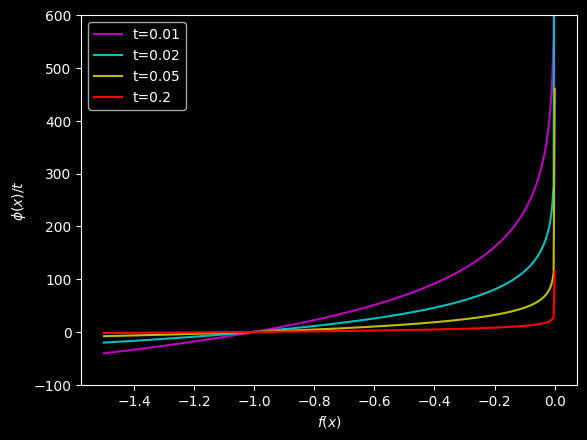

In [44]:
def log_barrier(fx, t):
    return -np.log(-fx)/t

x = np.linspace(-1.5, -1e-10, 400)

plt.plot(x, log_barrier(x, 0.01), label="t=0.01", linestyle='-', color='m')
plt.plot(x, log_barrier(x, 0.02), label="t=0.02", linestyle='-', color='c')
plt.plot(x, log_barrier(x, 0.05), label="t=0.05", linestyle='-', color='y')
plt.plot(x, log_barrier(x, 0.2), label="t=0.2", linestyle='-', color='r')

plt.xlabel("$f(x)$")
plt.ylabel("$\phi(x)/t$")
plt.ylim(-100, 600)
plt.legend()
plt.show()

This is now an equality constrained problem and the objective function is twice differentiable with

$$\begin{align*}
\nabla \phi(x)&=\sum_{i=1}^m\frac{1}{-f_i(x)}\nabla f_i(x) \\
\nabla^2 \phi(x)&=\sum_{i=1}^m\frac{1}{f_i(x)^2}\nabla f_i(x)\nabla f_i(x)^T+\sum_{i=1}^m\frac{1}{-f_i(x)}\nabla^2 f_i(x)
\end{align*}$$
